#           👨👩  Employee Data Exploration & Analysis 
    Author: Brandon Tan 
    Date: 10/17/2021
## 📚 Table of Content 
>1.	Introduction (Business Problem) 
>2.	Project Goals and Objectives 
>3.	Project Flow and Sequence  
       1. Data Preparation 
           - Removing Constant Feature Column
       2. Data Understanding & Basic Statistics
           - Data Accuracy 
           - Time Period Recorded for Data 
           - Employee Levels Distributions
           - Department Head Counts
           - Cost Center Head Counts
           - Employee Status
       3. EDA (Data Exploration) 
           - Ratio for Level against Department & Cost Center
               - Level V Department
               - Level Comparison for low & High for each Department
               - Low Level Analytics Department (L1-L4)
               - High Level Anlytics Department (LM5 -LM7)
               - Level V Cost Center
               - Low Level Analytics Cost Center (L1-L4)
               - High Level Analytics Cost Center (LM5 -LM7)
           - Data Analysis (Extracting information from different variables) 
               - The most effective way to acquire talent
               - Which Hiring Source attracts what level of employees
               - Hiring Source compare to departments
>4.	Key Findings & Suggestions 
>5.	Appendix 
        - Tools and Libraries used 
        - Suggestions & Questions 
## 👔 Introduction / Business Problem 
> Money Lion is one stop shop for all our financial needs. The company has recently reached a milestone of going public, while much of the success came from their innovation and vision to solve people's financial needs, it is no doubt a strong backend business system is part of the success. Today I will be exploring and analysing their employee data which reflects the hiring efficiency and employee productivity. 

## 🎯 Project Goals and Objectives 
> The objective is to extract actionable insights that would increase the overall efficiency of the hiring process, increse employee productivity and to mitigate losses on hiring investments. 

### A. Data Preparation
1. This project is done both in excel and jupyter notebook(python)
      - Work done in excel includes: sorting / filtering / adding Cost Center column / Removing incomplete columns
      - Work Done in python: removing Location column
2. For this particular project for we do not remove any rows that has the slightest information. Since we do not need to do predictive analysis, we are not feeding the data for training hence any information retained is valuable for our discovery. However, since location is a constant feature, it does not provide any relevant information to our analysis, we will remove it. 
3. Null value datas are wild cards that have weight in either category of each unique column 

**Import Libraries**

In [34]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import hvplot.pandas
import hvplot
import warnings

**Reading CSV File**

In [2]:
# Reading people ops file
df = pd.read_csv('People Ops Analyst Test.csv')
# Display max column
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

**Removing Location Column**

In [3]:
# Remove Location 
df.drop(['Location'], axis=1, inplace = True)

In [86]:
df.head(10)

,Department,Job Title,Hiring Source,Hire Date,Level,Employment Status,Cost Center
0,AI Engineering,Chief AI Officer,NaN,7/1/2014,L8,Full-Time,AI & Data Services
1,Information Security Audit,Information Security & Engineering Portfolio M...,NaN,7/1/2014,L4,Full-Time,Security
2,AI Engineering,Chief Engineer,Referral,8/1/2014,LM6,Full-Time,AI & Data Services
3,Data Science,Director of Analytics,NaN,1/12/2015,LM6,Full-Time,AI & Data Services
4,Product Engineering,Lead Software Engineer,Referred,11/23/2015,L4,Full-Time,Engineering
5,Product Engineering,Lead Software Engineer,Referred,7/4/2016,L4,Full-Time,Engineering
6,Product Engineering,Director of Mobile,Sourced,11/7/2016,LM5,Full-Time,Engineering
7,AI Engineering,Application Architect,Referred,12/12/2016,L4,Full-Time,AI & Data Services
8,R&D Engineering,Lead R&D Engineer,NaN,6/1/2017,LM5,Full-Time,AI & Data Services
9,Data Science,Senior Data Scientist,NaN,6/19/2017,L3,Full-Time,AI & Data Services


### B. Data Understanding and Basic Stats

**1. Data Accuracy**

We want to see if this data sample is accurate and correctly stored. 
   - Job Titlle with Levels (the logic assumption here is that a high level executive would not be listed as L1/ L2) 

We will only sample L1-L2 to see if any high level excutives are mistakenly recorded.


In [22]:
# Checking for data accuracy 
search_values = ['L1','L2']
temp_df = df[df.Level.str.contains('|'.join(search_values))]
temp_df['Job Title'].value_counts()

Data Scientist                     12
Mobile Engineer                     8
Software Engineer                   6
Data Engineer                       5
Automation QA Engineer              4
Data Analyst                        3
Mobile Engineer (R&D)               3
AI Engineer                         3
HR Executive                        2
Product Analyst                     2
Cybersecurity Analyst               2
Service Desk Analyst                2
Senior Software Engineer            2
Talent Acquisition Executive        2
Software Engineer, R&D              1
People Ops & Legal Associate        1
Content Writer                      1
System Administrator                1
Senior System Administrator         1
Application Security Specialist     1
Marketing Campaign Executive        1
Security Engineer                   1
QA Engineer                         1
Product Designer                    1
Copywriter                          1
R&D Engineer                        1
Product Mana

Base on personal logic from the sample tested, there were no high level executives that were mistakenly listed under L1 -L2 hence we would assume that the data is accurate.

**2. Time Period Recorded for Data**

In [194]:
df['Hire Date'] =  pd.to_datetime(df['Hire Date'], format= '%m/%d/%Y')
df.sort_values(by='Hire Date',ascending=True)

,Department,Job Title,Hiring Source,Hire Date,Level,Employment Status,Cost Centre
92,Information Security Audit,Information Security & Engineering Portfolio M...,NaN,2014-07-01,L4,Full-Time,Security
32,AI Engineering,Chief AI Officer,NaN,2014-07-01,L8,Full-Time,AI & Data Services
31,AI Engineering,Chief Engineer,Referral,2014-08-01,LM6,Full-Time,AI & Data Services
89,Data Science,Director of Analytics,NaN,2015-01-12,LM6,Full-Time,AI & Data Services
17,NaN,NaN,NaN,2015-06-08,NaN,Contractor,NaN
16,NaN,NaN,NaN,2015-11-02,NaN,Contractor,NaN
200,Product Engineering,Lead Software Engineer,Referred,2015-11-23,L4,Full-Time,Engineering
199,Product Engineering,Lead Software Engineer,Referred,2016-07-04,L4,Full-Time,Engineering
198,Product Engineering,Director of Mobile,Sourced,2016-11-07,LM5,Full-Time,Engineering
30,AI Engineering,Application Architect,Referred,2016-12-12,L4,Full-Time,AI & Data Services


Data contains information from year 2014 – 2021

**Hiring Trend Overtime**

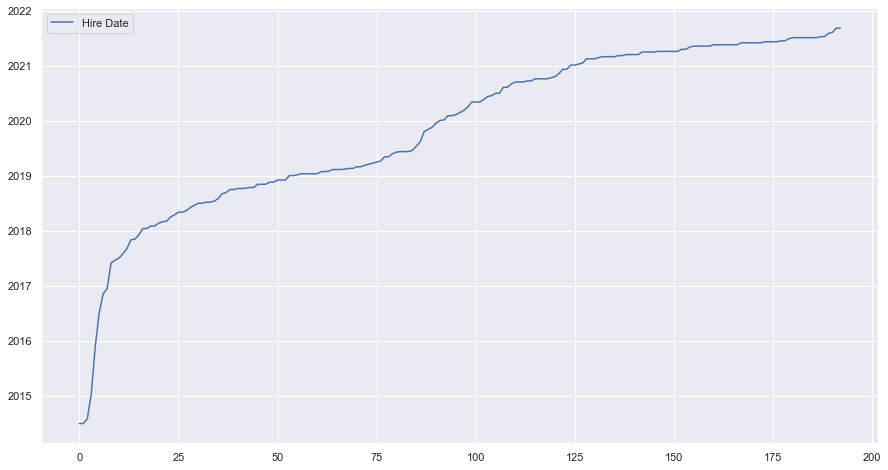

In [122]:
df['Hire Date'] = pd.to_datetime(df['Hire Date'])
df.plot()

The Hiring rate has increased dramatically starting from year 2018 - 2021

**3. Level- We want to see if the compay consist of all levels of people**

In [4]:
# Create a duplicated dataframe for analysis 
df_copy = df
df_copy = df_copy.loc[~df_copy['Level'].str.contains('nan',na=False)]
df_copy['Level'].value_counts().hvplot.bar(
    title="Level Counts", xlabel='Levels', ylabel='Count', 
    width=500, height=350)


:Bars   [index]   (Level)

Visualizing the data we can see that the data does not have employees of level L5, L6, and L7 (Individual Contributor). This would mean that the talent could be further motivated to achieve greater heights where they can transcend to a L5/L6/L7 employee. Understanding this, the next step is to think about how to create an environment / path that would inspired people to think out of the box.


We can also see that there is one anomaly which is L8 and its not classified under the leveling framework which is the Chief AI Officer.


**4. Department- Which department hires the most people**

In [5]:
# Visualizing data
df_copy['Department'].value_counts().hvplot.barh(
    title="Department Hire Counts", xlabel='Departments', ylabel='Count', 
    width=500, height=350)

:Bars   [index]   (Department)

As a whole Product Engineers are hired the most. This shows where the company's emphasis and vision is on, making sure the application/ platform is properly configured for consumers.

**5. Cost Centers- Which cost center has the most head counts?**


In [6]:
df_copy['Cost Center'].value_counts().hvplot.bar(
    title="Cost Center Head Counts", xlabel='Cost Center', ylabel='Count', 
    width=500, height=350)

:Bars   [index]   (Cost Center)

**6. Employment Status**

In [7]:
df_copy['Employment Status'].value_counts().hvplot.area(
    title="Department Hire Counts", xlabel='Departments', ylabel='Count', 
    width=500, height=350).opts(bgcolor='#fbecc4')

:Area   [index]   (Employment Status)

Most of the employees are hired fulltime and very few are on a contractual basis. While having a lot of fulltimers is great when there is a lot of work to be done, an important factor to consider is whether it increases the productivity and worth the ROI. 

### C. Exploratory Data Analysis 

**1. Ratio for Level against Department & Cost Center**

To compare the distribution of Levels between Department and Cost Centers we split it to two groups:
   - low_level (L1 - L4)
   - high_level (LM5 - LM7)

**i) Level v Department**

In [9]:
# Copy data file
df_1 = df
# Remove Hiring Source 
df_1.drop(['Hiring Source'], axis=1, inplace = True)
# Drop Na from data after Hiring Source is removed to remove empty 'level' columns
df_1 = df_1.dropna()

In [10]:
# Creat a new dataframe with the counted values for each level to department 
lvd_df = pd.DataFrame({'Count' : df_1.groupby( ["Department", "Level"] ).size()}).reset_index()
lvd_df.hvplot.table(columns=['Department', 'Level','Count'], sortable=True, selectable=True,
                  width=800, height=400)

:Table   [Department,Level,Count]

Splitting the Data between two groups (L1-l4) & (LM5 - LM7), namely low_level_df & high_level_df

In [11]:
search_values_low = ['L0','L1','L2','L3','L4']
low_level_df = lvd_df[lvd_df.Level.str.contains('|'.join(search_values_low))]

In [12]:
search_values_high = ['LM5','LM6','LM7']
high_level_df = lvd_df[lvd_df.Level.str.contains('|'.join(search_values_high))]

In [13]:
def calculate_ratio(x,y,z): 
    low_sum = x['Count'].sum()
    high_sum = y['Count'].sum()
    total_sum = z['Count'].sum()
    low_ratio = round((low_sum / total_sum)*100,2)
    high_ratio = round((high_sum / total_sum)*100,2)
    print('Low Level Percentage:',low_ratio)
    print('High Level Percentage:', high_ratio)
calculate_ratio(low_level_df,high_level_df,lvd_df)

Low Level Percentage: 92.05
High Level Percentage: 6.82


About 92.05% of employess belong in the lower level group as compared 6.82% in the upper level.

**ii) Level comparison for low and high for each Department**

In [38]:
# We first take a look at all the departments available
lvd_df['Department'].unique()

array(['AI Engineering', 'AI Service Delivery', 'Cybersecurity',
       'Data Engineering', 'Data Science', 'Finance',
       'Information Security Audit', 'Information Technology Services',
       'Marketing Analytics', 'People Ops', 'Product',
       'Product Engineering', 'R&D Engineering'], dtype=object)

In [14]:
# Write a function for the comparison 
def low_high_comparison(x,low,high,value): 
    search_values = [x]
    low_df = low[low[value].str.contains('|'.join(search_values))]
    low_com = low_df['Count'].sum()
    high_df = high[high[value].str.contains('|'.join(search_values))]
    high_com = high_df['Count'].sum()
    total_com = low_com + high_com
    low_level_perc = round((low_com / total_com)* 100,2)
    high_level_perc = round((high_com / total_com)* 100,2)
    print('%s Low Level Percentage:'%x,low_level_perc)
    print('%s High Level Percentage:'%x,high_level_perc)
    print('===========================================')

In [22]:
for x in lvd_df['Department'].unique():
    low_high_comparison(x,low_level_df,high_level_df,'Department')

AI Engineering Low Level Percentage: 92.86
AI Engineering High Level Percentage: 7.14
AI Service Delivery Low Level Percentage: 77.78
AI Service Delivery High Level Percentage: 22.22
Cybersecurity Low Level Percentage: 90.0
Cybersecurity High Level Percentage: 10.0
Data Engineering Low Level Percentage: 88.89
Data Engineering High Level Percentage: 11.11
Data Science Low Level Percentage: 95.65
Data Science High Level Percentage: 4.35
Finance Low Level Percentage: 100.0
Finance High Level Percentage: 0.0
Information Security Audit Low Level Percentage: 100.0
Information Security Audit High Level Percentage: 0.0
Information Technology Services Low Level Percentage: 100.0
Information Technology Services High Level Percentage: 0.0
Marketing Analytics Low Level Percentage: 100.0
Marketing Analytics High Level Percentage: 0.0
People Ops Low Level Percentage: 87.5
People Ops High Level Percentage: 12.5
Product Low Level Percentage: 94.74
Product High Level Percentage: 5.26
Product Engineerin

Most low level departments are above the 85 percentile except for AI Service Delivery.

**iii) Low Level Analysis (L1-L4)** 

In [13]:
low_level_df.hvplot.table(columns=['Department', 'Level','Count'], sortable=True, selectable=True,
                  width=800, height=400)

:Table   [Department,Level,Count]

From the table above we can sort 'Level/Department/Count' by clickng on it to see the distribution and amount of employees in Department v Levels. 

In [14]:
# Create new Dataframe to see which department hired the most for (L1-L4)
low_level_df_2 = df_1[df_1.Level.str.contains('|'.join(search_values_low))]

In [15]:
low_level_df_2['Department'].value_counts().hvplot.barh(
    title="Department Hires Low", xlabel='Department', ylabel='Count', 
    width=500, height=350)

:Bars   [index]   (Department)

From the Barh Chart we can hover over the diagram to see the exact number of hire in each department. 

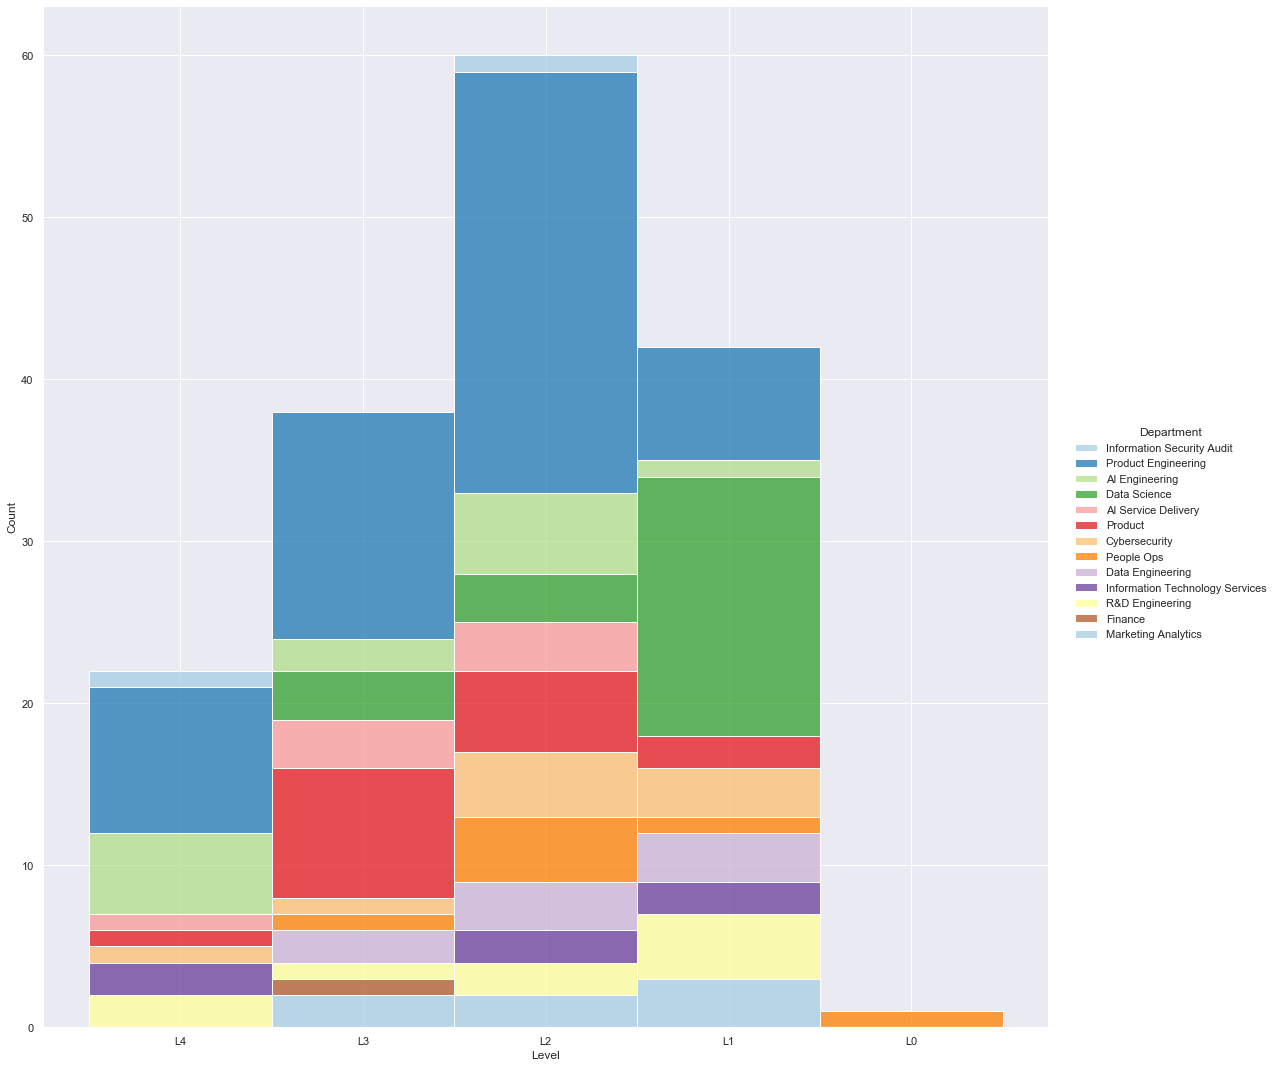

In [130]:
# Histogram to see department distribution by levels
sns.displot(low_level_df_2, x="Level", hue="Department",multiple="stack",height=15,palette='Paired')

Low Level Findings: 
    1. Most L1 hires are Data Scientist 
    2. Most L2 & L3 & L4 hires are Product Engineers 
    3. Most employees fall under the level ranking of L2.

**iv) High Level Analysis (LM5-LM7)**

In [16]:
high_level_df.hvplot.table(columns=['Department', 'Level','Count'], sortable=True, selectable=True,
                  width=800, height=300)

:Table   [Department,Level,Count]

The High Level Department are evenly spread across the top 5 most employed departments. This mean for the top 5 departments, each of them have a leader to guide and distribute knowledge for their respective field. The only department with average hires that lacks a leader is the Marketing Analytics department. 

In [17]:
# Create new Dataframe to see which department hired the most for (L1-L4)
high_level_df_2 = df_1[df_1.Level.str.contains('|'.join(search_values_high))]
high_level_df_2['Department'].value_counts().hvplot.barh(
    title="Department Hires High", xlabel='Department', ylabel='Count', 
    width=500, height=350)

:Bars   [index]   (Department)

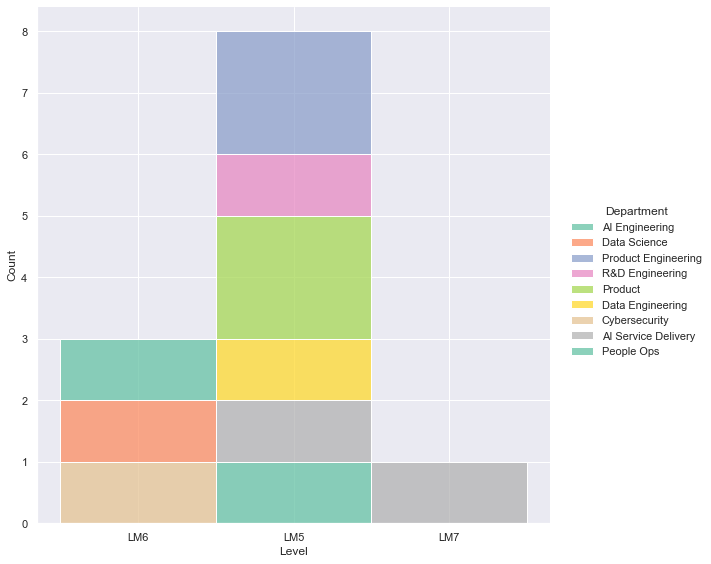

In [133]:
# Histogram to see department distribution by levels
sns.displot(high_level_df_2, x="Level", hue="Department",multiple="stack",height=8,palette='Set2')

High Level Findings
    1. There are no Individual Contributors (L5-L7) 
    2. Most high level employees are LM5
    3. Marketing Analystics lack a leader

**v) Level v Cost Centers**

In [18]:
# Creat a new dataframe with the counted values for each level to Cost Center 
lvc_df = pd.DataFrame({'Count' : df_1.groupby( ["Cost Center", "Level"] ).size()}).reset_index()
lvc_df.hvplot.table(columns=['Cost Center', 'Level','Count'], sortable=True, selectable=True,
                  width=800, height=400)

:Table   [Cost Center,Level,Count]

In [19]:
# Repeating some of the code above for easy visuals
search_values_low = ['L1','L2','L3','L4']
low_level_df_c = lvc_df[lvc_df.Level.str.contains('|'.join(search_values_low))]
search_values_high_c = ['LM5','LM6','LM7']
high_level_df_c = lvc_df[lvc_df.Level.str.contains('|'.join(search_values_high))]

In [56]:
for x in lvc_df['Cost Center'].unique():
    low_high_comparison(x,low_level_df_c,high_level_df_c, 'Cost Center')

AI & Data Services Low Level Percentage: 91.67
AI & Data Services High Level Percentage: 8.33
Engineering Low Level Percentage: 94.74
Engineering High Level Percentage: 5.26
Office Management  Low Level Percentage: 87.5
Office Management  High Level Percentage: 12.5
Security Low Level Percentage: 94.44
Security High Level Percentage: 5.56


The Cost Center with the most low level hires is Engineering and the most high level hire is Office Management.

**vi) Low Level Analysis (L1-L4)** 

In [20]:
low_level_df_c.hvplot.table(columns=['Cost Center', 'Level','Count'], sortable=True, selectable=True,
                  width=800, height=400)

:Table   [Cost Center,Level,Count]

In [21]:
# Create new Dataframe to see which department hired the most for (L1-L4)
low_level_df_3 = df_1[df_1.Level.str.contains('|'.join(search_values_low))]
low_level_df_3['Cost Center'].value_counts().hvplot.barh(
    title="Cost Center Hires Low", xlabel='Cost Center', ylabel='Count', 
    width=500, height=350)

:Bars   [index]   (Cost Center)

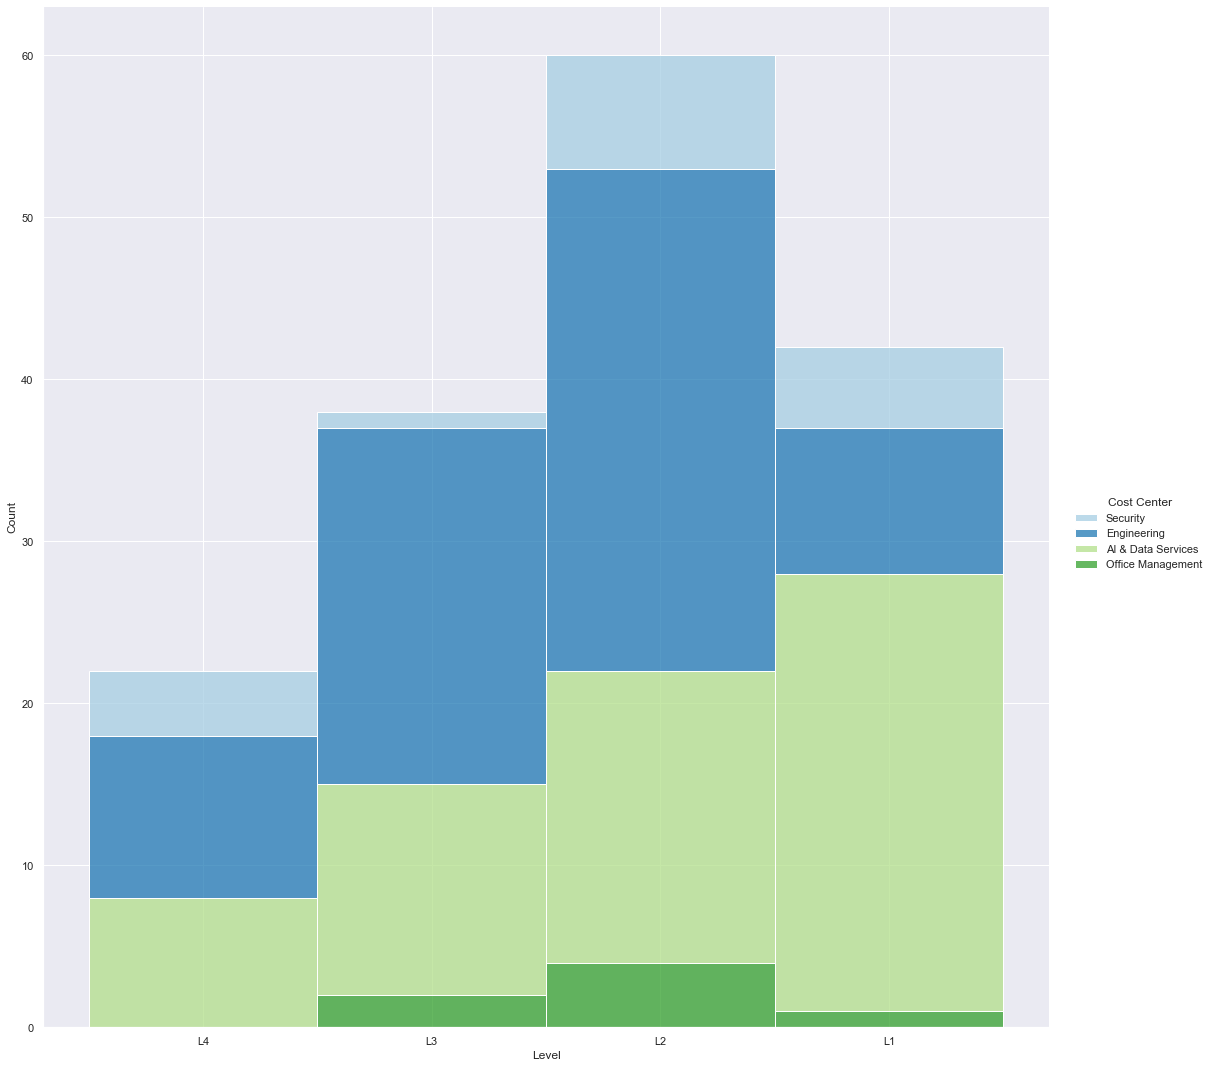

In [148]:
# Histogram to see department distribution by levels
sns.displot(low_level_df_3, x="Level", hue="Cost Center",multiple="stack",height=15,palette='Paired')

**vii) High Level Analysis (LM5-LM7)** 

In [22]:
high_level_df_c.hvplot.table(columns=['Cost Center', 'Level','Count'], sortable=True, selectable=True,
                  width=800, height=200)

:Table   [Cost Center,Level,Count]

In [23]:
# Create new Dataframe to see which department hired the most for (LM5-LM7)
high_level_df_3 = df_1[df_1.Level.str.contains('|'.join(search_values_high))]
high_level_df_3['Cost Center'].value_counts().hvplot.barh(
    title="Cost Center Hires High", xlabel='Cost Center', ylabel='Count', 
    width=500, height=350)

:Bars   [index]   (Cost Center)

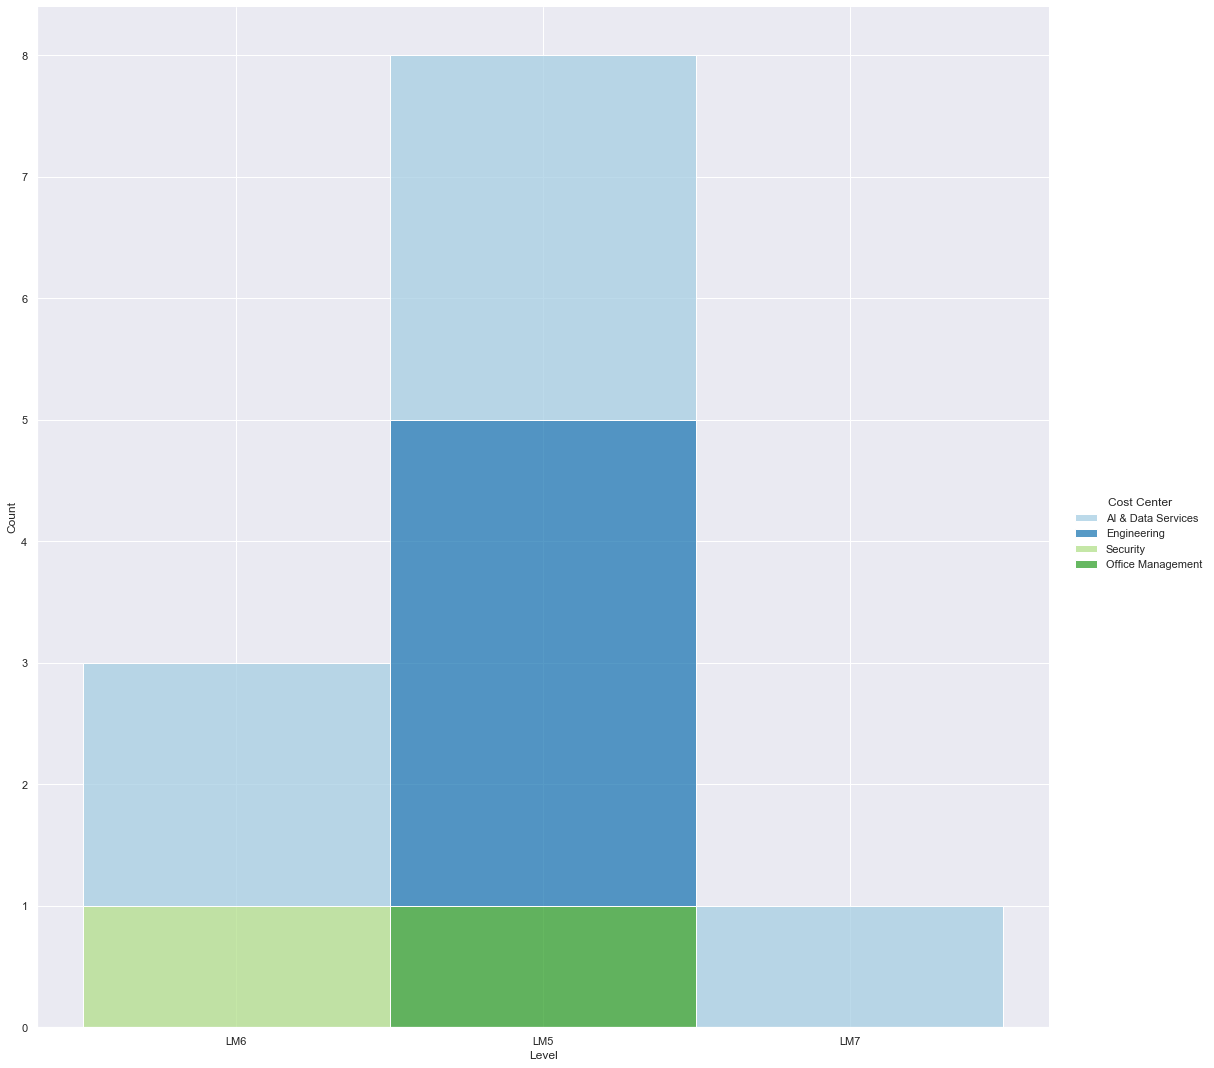

In [152]:
# Histogram to see department distribution by levels
sns.displot(high_level_df_3, x="Level", hue="Cost Center",multiple="stack",height=15,palette='Paired')

**2. Data Analysis (Exploring relationships between different variables)**

For this part we will be exploring:

     i. The most effective way to aquire talent 
     ii. Which hiring source attracts what level of employess
     iii. Hiring Source Compare to departments 
     

**i) The most effective way to acquire talent**

In [25]:
df = pd.read_csv('People Ops Analyst Test.csv')
# Copy data file
df_2 = df
df_2 = df_2.dropna()
# Quick check for null values
df_2.isna().sum()

Department           0
Job Title            0
Location             0
Hiring Source        0
Hire Date            0
Level                0
Employment Status    0
Cost Center          0
dtype: int64

In [26]:
df_2['Hiring Source'].value_counts().hvplot.barh(
    title="Cost Center Head Counts", xlabel='Cost Center', ylabel='Count', 
    width=500, height=350)

:Bars   [index]   (Hiring Source)

if we are spending a lot of money on job portal - inbound, we need to rethink our decision

**ii) Which hiring source attracts what level of employess**

In [27]:
hs_df = pd.DataFrame({'Count' : df_2.groupby( ["Hiring Source", "Level"] ).size()}).reset_index()

In [28]:
hs_df.hvplot.table(columns=['Hiring Source', 'Level','Count'], sortable=True, selectable=True,
                  width=800, height=400)

:Table   [Hiring Source,Level,Count]

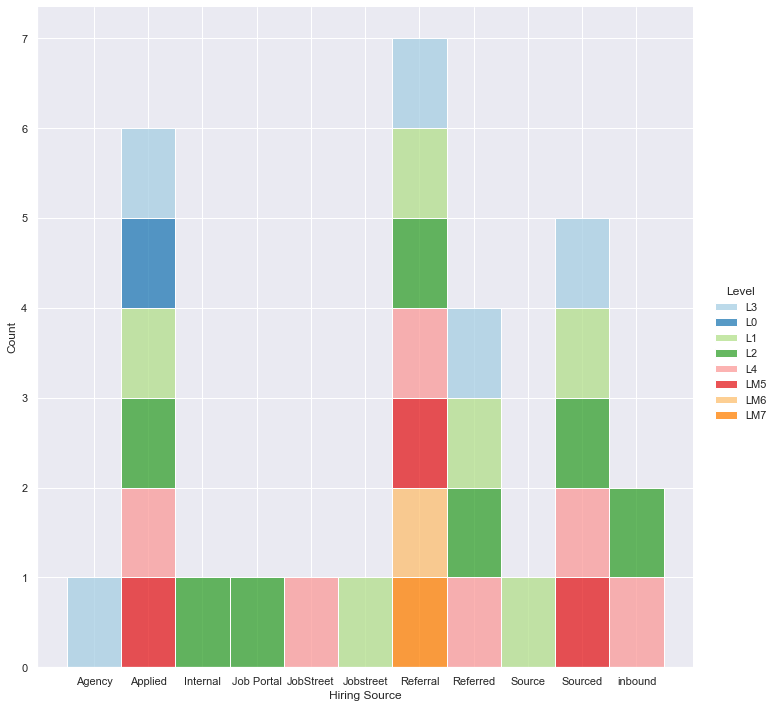

In [171]:
sns.displot(hs_df, x="Hiring Source", hue="Level",multiple="stack",height=10,palette='Paired')

Findings
    1. Most effective method to hire High Level Employees are through Referral 
    2. Jobstreet Hiring Source is the least effective in hiring talent and also the worst option to hire high level talent
    3. This data recorded might not be accurate as there are repetitive variables.
    4. Most People that got promoted is only from L1 because internal hires only consist of L2

**iii) Hiring Source Compare to Departments**

In [29]:
hsd_df_d = pd.DataFrame({'Count' : df_2.groupby( ["Hiring Source", "Department"] ).size()}).reset_index()
hsd_df_d.hvplot.table(columns=['Hiring Source', 'Department','Count'], sortable=True, selectable=True,
                  width=800, height=400)

:Table   [Hiring Source,Department,Count]

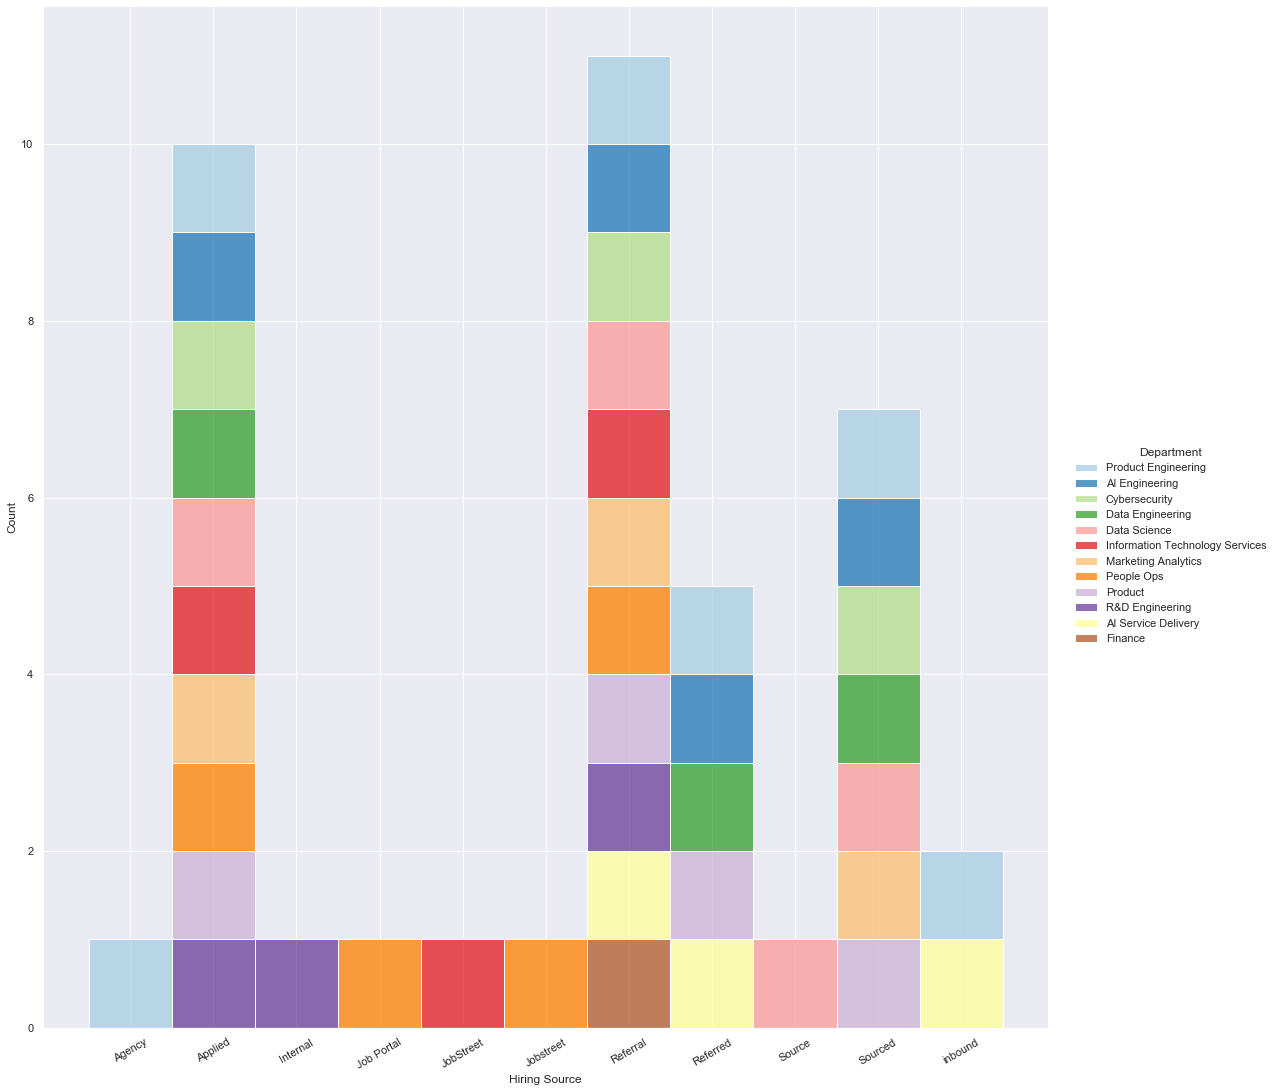

In [169]:
ax = sns.displot(hsd_df_d, x="Hiring Source", hue="Department",multiple="stack",height=15,palette='Paired')
ax.set_xticklabels(rotation=30)

Depending which type of talent we want to hire, we can look at the histogram to see which is the most effective way to hire the specific individual.

## 📋 Key Findings & Suggestion
**Key Findings**
     1.	Promotions only happen to people from L1 since internal hire only consist of L2
     2.	Lack of Individual Contributor (L5, L6, L7)
     3.	Lack of leadership in Marketing Analytics Department 
     4.	Most Expenses spent is on Engineering and AI cost centers 
     5.	Best Hiring Source for high level employees are through referral 
     6.	Job street is the worst option when it comes to hiring talent  

**Suggestion for Improvement**
    1. Since Promotion only happens to people from L1, there is a question of whether talented people are leaving the company or the promotion criteria is hard to achieve. Suggestion here is to explore why talented people are leaving and how do you retain talent from leaving. 
    
     2. The lack of individual contributors raises the question of whether the talent hired are accurate to the leveling framework or the lack of inspirational events in the company. Suggestion here is to encourage employees to take part in leadership event and to train their ability to think out of the box. 
     
     3. Most expenses are spent on Engineering and hiring Product Engineers, the question we should ask here is whether the ROI is worth the investment? is everyone in the engineering department contributing to the productivity of the company? Suggestion here is to closely monitor everyone's KPI and do a simple ROI calculation to see whether it yields a positive return whether in the short/long term. 
     
     4. To minimize the budget and time spend recruitng talent, the company should cut of channels that does not yield a positive return and only focus on channels like 'Applied' / 'Referred' / 'Source'. Understand that we cant control the applicants that applied themselves, but the company could spend more time and budget on 'Referred' and 'Source. 

## 📘 Appendix
>### Tools and Libraries Used

>| Job |  Tools |Description|
| --- | --- | --- |
| Data Cleaning / Wrangling | Pandas / Excel  | Pandas is used to remove constant feature columns while Excel is used for sorting / filtering / adding Cost Center column / Removing incomplete columns  |
| Visualization | Bokeh / Matplotlib / Seaborn  | Bokeh is used to create Bar/Barh/Table Charts while Matplotlib and Seaborn is used to create Line Chart for time series and Histograms  |

>### Data Used
>| File Name | File Type |Description|
| --- | --- | --- |
| People Ops Analyst Test | csv | Used to extract data for exploration and analysis |
| Levelling Framework | pdf | Used to understand the breakdown of how levels work in MoneyLion.
 |